# Pranav Dev Kottimukkalur Ramasubramanian


# Task 1: Data Preparation and Analysis


## Task 1.1


In [1]:
#loading the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
!pip install kneed

In [2]:
data = r'D:\RMIT\MC242_Master of Analytics\SECOND SEMESTER\Practical Data Science Python\Assignment 2\A2data.csv'

In [3]:
ph_value = pd.read_csv(data, sep = ';', header = 0)

In [4]:
ph_value.shape

(4781, 12)

In [5]:
ph_value.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
ph_value.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
6,6.3,0.48,0.04,1.1,0.046,30,99,0.9928,3.24,0.36,9.6,6
7,6.2,0.66,0.48,1.2,0.029,29,75,0.9892,3.33,0.39,12.8,8
8,7.4,0.34,0.42,1.1,0.033,17,171,0.9917,3.12,0.53,11.3,6
9,6.5,0.31,0.14,7.5,0.044,34,133,0.9955,3.22,0.50,9.5,5


In [7]:
## Checking if there are rows with missing data
rows_with_missing_values = ph_value[ph_value.isnull().any(axis=1)]

#Displaying the user whether there are missing values
if not rows_with_missing_values.empty:
    print("There are rows with missing values! Need to get rid of them.")
else:
    print("There are no rows with missing values in the dataset.")

There are rows with missing values! Need to get rid of them.


In [8]:
# Dropping rows with missing values before taking the random sample
ph_value = ph_value.dropna()

In [9]:
ph_value.dtypes #Checking the datatypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar           object
chlorides               float64
free sulfur dioxide      object
total sulfur dioxide     object
density                  object
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
#Replacing empty cells with NaN
ph_value['residual sugar'] = np.where(ph_value['residual sugar'] == ' ', np.nan, ph_value['residual sugar'])
ph_value['density'] = np.where(ph_value['density'] == ' ', np.nan, ph_value['density'])

# Dropping rows with NaN values in the entire DataFrame
ph_value = ph_value.dropna()

In [11]:
#Changing the datatype of residual sugar, quality and density to float
ph_value['residual sugar'] = ph_value['residual sugar'].astype(float)
ph_value['density'] = ph_value['density'].astype(float)
ph_value['quality'] = ph_value['quality'].astype(float)

In [12]:
ph_value.shape #Checking the shape

(4750, 12)

In [13]:
print(ph_value.dtypes)
print("\n The datatypes have been changed to float")

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide      object
total sulfur dioxide     object
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

 The datatypes have been changed to float


In [14]:
sample_size = 600 #Setting the random sample size as 600
if len(ph_value) < sample_size:
    sample_size = len(ph_value) #Incase if the sample size is less than 600, it takes that value itself

random.seed(42)
random_sample = ph_value.sample(sample_size)    

In [15]:
# Displaying the head of the random sample
random_sample.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3582,6.8,0.16,0.18,1.8,0.046,31,114,0.99226,3.27,0.55,10.8,6.0
41,6.6,0.25,0.29,1.1,0.068,39,124,0.99140,3.34,0.58,11.0,7.0
4318,6.6,0.24,0.22,12.3,0.051,35,146,0.99676,3.10,0.67,9.4,5.0
4718,6.0,0.34,0.29,6.1,0.046,29,134,0.99462,3.48,0.57,10.7,6.0
1275,7.3,0.42,0.38,6.8,0.045,29,122,0.99250,3.19,0.37,12.6,7.0


In [16]:
# Showing the size of the random sample
print("Size of the random sample (rows, columns):", random_sample.shape)

Size of the random sample (rows, columns): (600, 12)


In [17]:
#writing the sample to csv
random_sample.to_csv('A2RandomSample.csv', index=False)
print("Random sample without missing values written to A2RandomSample.csv.")

Random sample without missing values written to A2RandomSample.csv.


## Task 1.2


In [18]:
random_sample = pd.read_csv('A2RandomSample.csv') #Loading the random data

In [19]:
random_sample.head() #displaying the head

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.16,0.18,1.8,0.046,31.0,114.0,0.99226,3.27,0.55,10.8,6.0
1,6.6,0.25,0.29,1.1,0.068,39.0,124.0,0.99140,3.34,0.58,11.0,7.0
2,6.6,0.24,0.22,12.3,0.051,35.0,146.0,0.99676,3.10,0.67,9.4,5.0
3,6.0,0.34,0.29,6.1,0.046,29.0,134.0,0.99462,3.48,0.57,10.7,6.0
4,7.3,0.42,0.38,6.8,0.045,29.0,122.0,0.99250,3.19,0.37,12.6,7.0


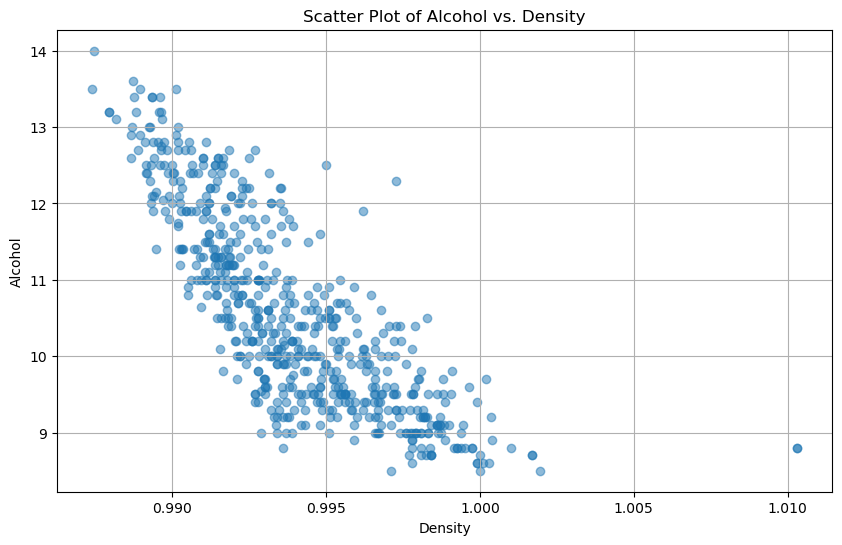

In [20]:
#plotting the relationship between density and alochol content
plt.figure(figsize=(10, 6))
plt.scatter(random_sample['density'], random_sample['alcohol'], alpha=0.5)
plt.title('Scatter Plot of Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.grid(True)

In [21]:
from sklearn.linear_model import LinearRegression
# Building a Simple Linear Regression model
X = random_sample[['density']] #setting density as independant variable
y = random_sample['alcohol'] #setting alcohol as dependant variable

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

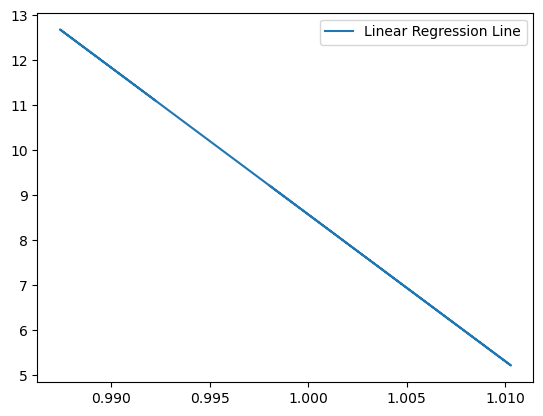

In [22]:
# Visualizing the linear regression line
plt.plot(X, model.predict(X))
plt.legend(['Linear Regression Line', 'Data Points'])
plt.show()

In [23]:
# Getting and displaying the coefficient and Intercept of the linear model
coefficient = model.coef_[0]
intercept = model.intercept_

print(f"Coefficient: {coefficient:.4f}")
print(f"Intercept: {intercept:.4f}")

Coefficient: -326.1727
Intercept: 334.7451


## Task 1.3


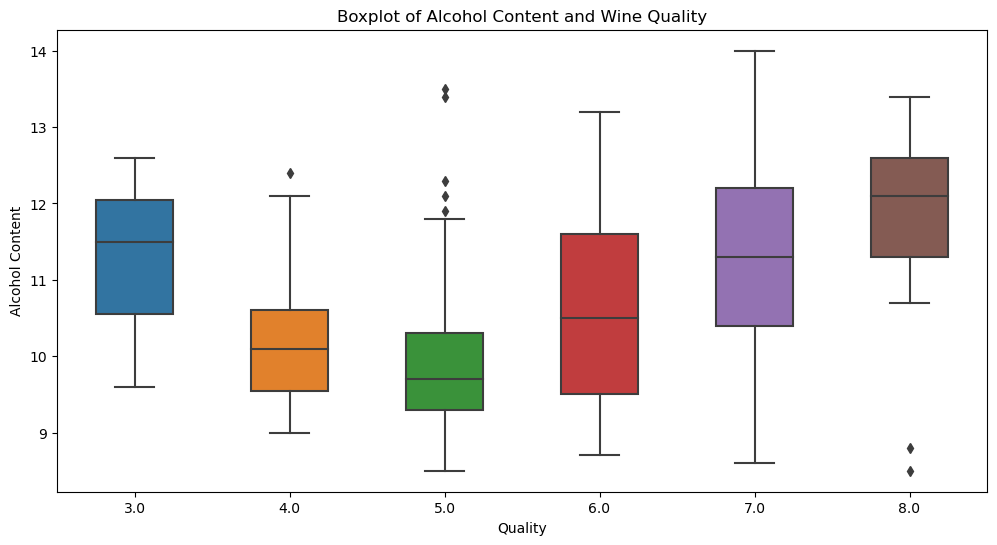

In [24]:
#Creating boxplot of Alochol content and wine quality using seaborn and matplotlib.pyplot
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', data=random_sample, width=0.5)
plt.title('Boxplot of Alcohol Content and Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.xticks(rotation=0)
plt.show()

# Task 2: Classification

## Task 2.1 

In [25]:
#Loading packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#Loading the data
wine_data = pd.read_csv('A2RandomSample.csv')

# Separating features (X) and target variable (y)
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"] 

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model using 4 metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.4888888888888889
Precision: 0.488967883967884
Recall: 0.4888888888888889
F1-score: 0.4873170413365272
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.17      0.17      0.17         6
         5.0       0.53      0.55      0.54        53
         6.0       0.55      0.52      0.54        82
         7.0       0.36      0.35      0.36        34
         8.0       0.38      0.75      0.50         4

    accuracy                           0.49       180
   macro avg       0.33      0.39      0.35       180
weighted avg       0.49      0.49      0.49       180



C:\Users\prana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\lib\site-packages\sklearn\metrics\_classifi

## Task 2.2 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

wine_data = pd.read_csv('A2RandomSample.csv')

# Separating features (X) and target variable (y)
X = wine_data.drop("quality", axis=1)  # Features
y = wine_data["quality"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Defining a set of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90],  # Different values for max_depth
}

# Performing a grid search with cross-validation to find the best parameter
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the parameter values and their corresponding accuracies
param_values = grid_search.cv_results_['param_max_depth']
accuracies = grid_search.cv_results_['mean_test_score']

print("Parameter considered: Max_Depth")
print("\n")
# Displaying all parameter values and their accuracies
for param, accuracy in zip(param_values, accuracies):
    print(f"max_depth: {param}, Accuracy: {accuracy:.4f}")

# Getting the best parameter value and the corresponding model
best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

# Fitting the best model on the entire training set
best_model.fit(X_train, y_train)

# Making predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluating the best model
accuracy = accuracy_score(y_test, y_pred)

# Printing the best parameter value and accuracy
print("\nBest max_depth:", best_max_depth)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Parameter considered: Max_Depth


max_depth: None, Accuracy: 0.4500
max_depth: 10, Accuracy: 0.4786
max_depth: 20, Accuracy: 0.4500
max_depth: 30, Accuracy: 0.4500
max_depth: 40, Accuracy: 0.4500
max_depth: 50, Accuracy: 0.4500
max_depth: 60, Accuracy: 0.4500
max_depth: 70, Accuracy: 0.4500
max_depth: 80, Accuracy: 0.4500
max_depth: 90, Accuracy: 0.4500

Best max_depth: 10


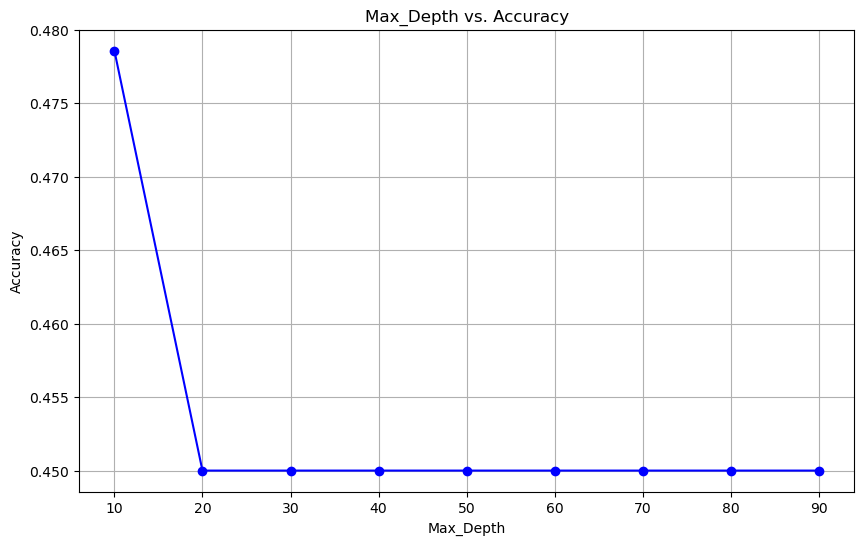

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(param_values, accuracies, 'bo-')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.title('Max_Depth vs. Accuracy')
plt.grid(True)
plt.show()

## Task 2.3 

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier


wine_data = pd.read_csv('A2RandomSample.csv')

# Separating features (X) and target variable (y)
X = wine_data.drop("quality", axis=1)  # Features
y = wine_data["quality"]  # Target variable

# Initializing the Decision Tree classifier with the optimal parameters
clf = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)

# Defining a list of different train/test split ratios to evaluate
split_ratios = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Initializing lists to store mean accuracy scores and standard deviations
mean_accuracy_scores = []
std_accuracy_scores = []

# Initializing StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterating through the split ratios and performing stratified cross-validation
for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state=42, stratify=y)
    accuracy_scores = cross_val_score(clf, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
    mean_accuracy = accuracy_scores.mean()
    std_accuracy = accuracy_scores.std()
    mean_accuracy_scores.append(mean_accuracy)
    std_accuracy_scores.append(std_accuracy)

# Finding the best split ratio with the highest mean accuracy
best_split_ratio = split_ratios[mean_accuracy_scores.index(max(mean_accuracy_scores))]

# Printing the mean accuracy scores and standard deviations for each split ratio
for i, split_ratio in enumerate(split_ratios):
    print(f"Split Ratio {split_ratio * 100}% - Accuracy: {mean_accuracy_scores[i]:.4f}")

# Printing the best split ratio
print(f"\nThe best train-test split ratio is {best_split_ratio * 100}%")

C:\Users\prana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Split Ratio 20.0% - Accuracy: 0.4083
Split Ratio 30.0% - Accuracy: 0.4278
Split Ratio 40.0% - Accuracy: 0.4375
Split Ratio 50.0% - Accuracy: 0.4300
Split Ratio 60.0% - Accuracy: 0.4000
Split Ratio 70.0% - Accuracy: 0.4153
Split Ratio 80.0% - Accuracy: 0.4542

The best train-test split ratio is 80.0%


C:\Users\prana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


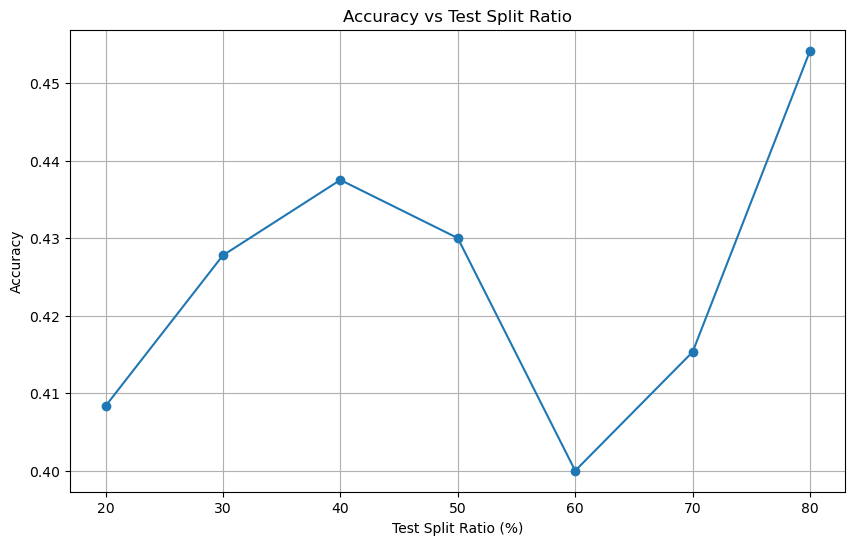

This graph shows that the best train-test split ratio is:  80.0


In [29]:
#Visualzing the Accuracy vs Test Split ratio
plt.figure(figsize=(10, 6))
plt.plot([ratio * 100 for ratio in split_ratios], mean_accuracy_scores, marker='o')
plt.title('Accuracy vs Test Split Ratio')
plt.xlabel('Test Split Ratio (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
print("This graph shows that the best train-test split ratio is: ",best_split_ratio*100)

# Task 3: Clustering

## Task 3.1 

In [30]:
## Cleaning to ensure the data is clean before clustering
wine_data.head()
wine_data = wine_data.dropna()

In [31]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.16,0.18,1.8,0.046,31.0,114.0,0.99226,3.27,0.55,10.8,6.0
1,6.6,0.25,0.29,1.1,0.068,39.0,124.0,0.99140,3.34,0.58,11.0,7.0
2,6.6,0.24,0.22,12.3,0.051,35.0,146.0,0.99676,3.10,0.67,9.4,5.0
3,6.0,0.34,0.29,6.1,0.046,29.0,134.0,0.99462,3.48,0.57,10.7,6.0
4,7.3,0.42,0.38,6.8,0.045,29.0,122.0,0.99250,3.19,0.37,12.6,7.0


In [32]:
#Dropping the column 'quality'
wine_without_quality = wine_data.drop('quality', axis=1)
wine_without_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.8,0.16,0.18,1.8,0.046,31.0,114.0,0.99226,3.27,0.55,10.8
1,6.6,0.25,0.29,1.1,0.068,39.0,124.0,0.99140,3.34,0.58,11.0
2,6.6,0.24,0.22,12.3,0.051,35.0,146.0,0.99676,3.10,0.67,9.4
3,6.0,0.34,0.29,6.1,0.046,29.0,134.0,0.99462,3.48,0.57,10.7
4,7.3,0.42,0.38,6.8,0.045,29.0,122.0,0.99250,3.19,0.37,12.6


In [33]:
## K means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialising k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Setting no of clusters as 2
clusters = kmeans.fit_predict(wine_without_quality)

# Evaluating the clustering using silhouette score
score = silhouette_score(wine_without_quality, clusters)
print(f"Silhouette Score for 2 clusters: {score}")

C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 2 clusters: 0.49256464693113655


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


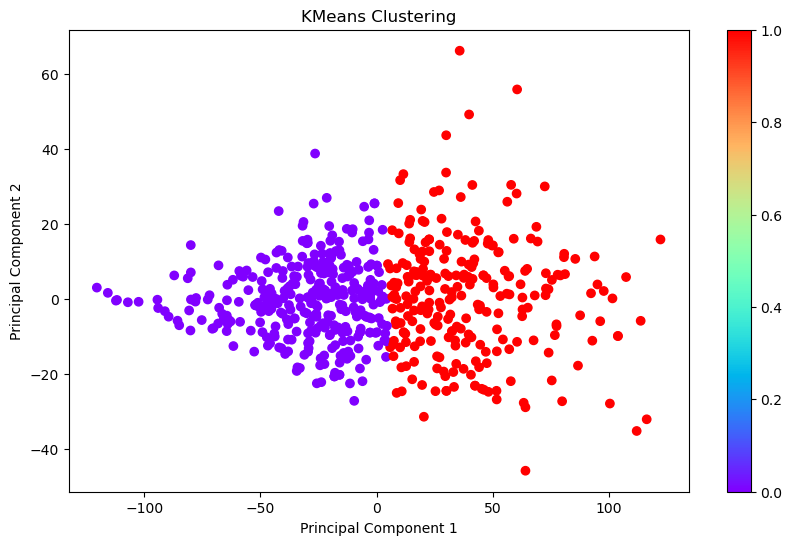

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #Initialising PCA with 2 components
pca_result = pca.fit_transform(wine_without_quality) #Applying PCA and reducing the data to 2 pricipal components

from sklearn.cluster import KMeans

optimal_k = 2  #Setting optimal_k as 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42) #Setting random seed of 42
kmeans_clusters = kmeans.fit_predict(wine_without_quality)

#Visualizing using matplotlib.pyplot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_clusters, cmap='rainbow')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

## Task 3.2 

C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

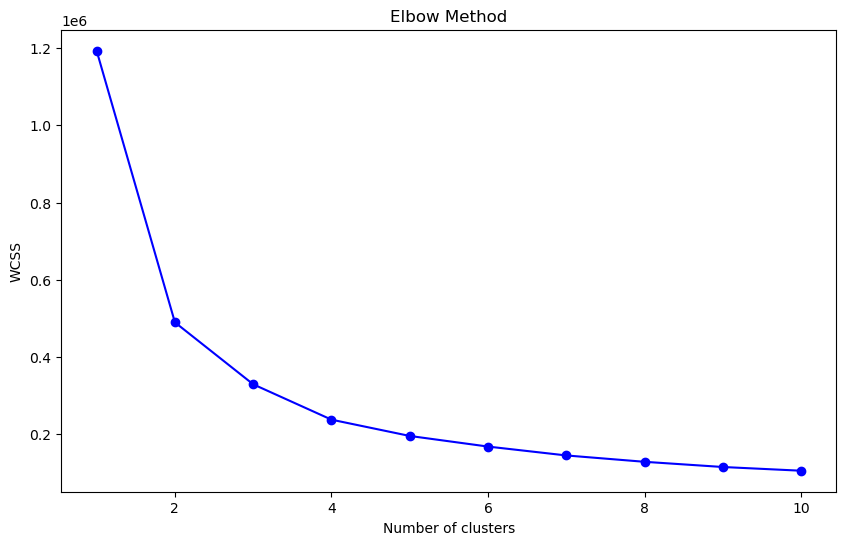

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Initializing to store a list of Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  # Tuning the n_clusters from 1 to 10
    kmeans.fit(wine_without_quality)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
import os
os.environ["OMP_NUM_THREADS"] = "3"  # To avoid warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 11):  # Setting range from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(wine_without_quality)

    # Evaluating the clustering using silhouette score
    score = silhouette_score(wine_without_quality, clusters)
    print(f"Silhouette Score for {n_clusters} clusters: {score:.4f}")


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 2 clusters: 0.4926


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 3 clusters: 0.4026


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 4 clusters: 0.3836


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 5 clusters: 0.3419


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 6 clusters: 0.3373


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 7 clusters: 0.3228


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 8 clusters: 0.3237


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 9 clusters: 0.3287


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 10 clusters: 0.3158


## Task 3.3 

In [37]:
cluster_assignments = kmeans_clusters

wine_with_clusters = wine_without_quality.copy() #creating a copy of the original dataframe
wine_with_clusters['cluster'] = cluster_assignments #adding a new column 'cluster'
wine_with_clusters['true_quality'] = wine_data['quality'] # containing the true quality labels from the original 'wine_data'

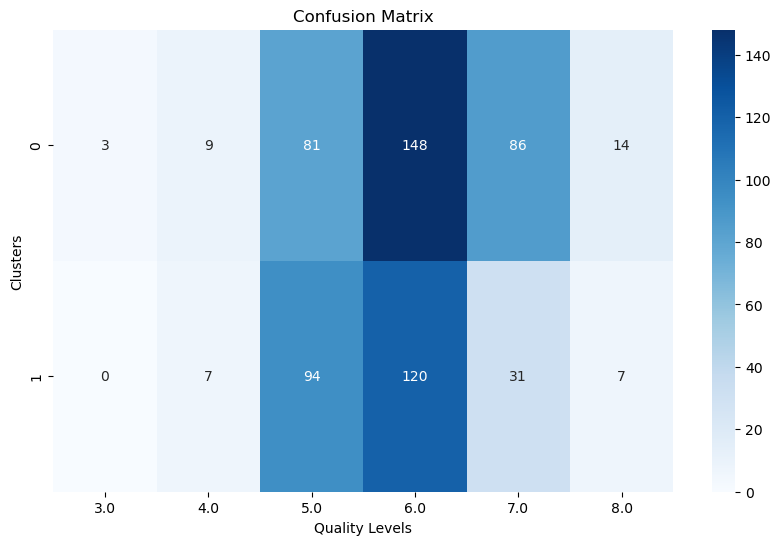

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Creating a DataFrame containing the cluster assignments and true quality labels
result_wine = pd.DataFrame({'Cluster': kmeans_clusters, 'Quality': wine_data['quality']})

#Creating a cross-tabulation
cross_tab = pd.crosstab(result_wine['Cluster'], result_wine['Quality'])

#Plotting the confusion matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Quality Levels')
plt.ylabel('Clusters')
plt.show()


In [39]:
#Creating a new dataframe with cluster and qulaity
result_wine = pd.DataFrame({'Cluster': kmeans_clusters, 'Quality': wine_data['quality']})

#Grouping by Cluster
dominant_quality = result_wine.groupby('Cluster')['Quality'].agg(lambda x: x.value_counts().index[0])
print(dominant_quality)

Cluster
0    6.0
1    6.0
Name: Quality, dtype: float64


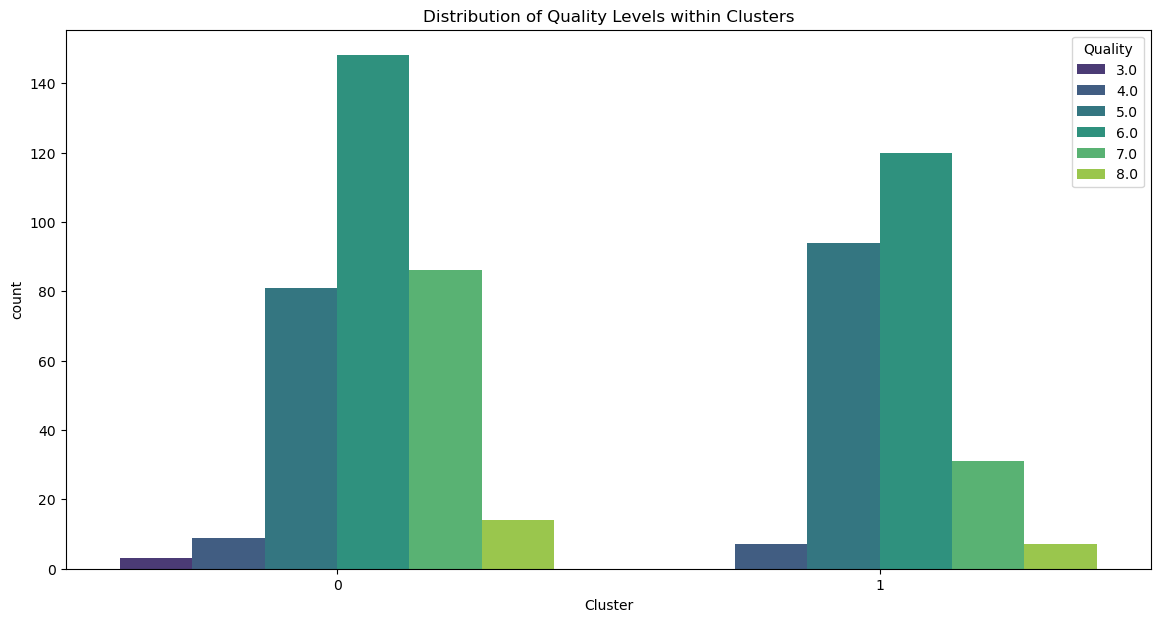

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualising Distribution of Quality Levels within Clusters
plt.figure(figsize=(14, 7))
sns.countplot(x='Cluster', hue='Quality', data=result_wine, palette='viridis')
plt.title('Distribution of Quality Levels within Clusters')
plt.show()

In [41]:
#Displaying the results
result_wine['Predicted_Quality'] = result_wine['Cluster'].map(dominant_quality)
result_wine

,Cluster,Quality,Predicted_Quality
0,0,6.0,6.0
1,0,7.0,6.0
2,1,5.0,6.0
3,0,6.0,6.0
4,0,7.0,6.0
...,...,...,...
595,0,5.0,6.0
596,1,6.0,6.0
597,0,6.0,6.0
598,0,7.0,6.0


In [42]:
#Calculating the overall accuracy for this model
result_wine['Matching'] = (result_wine['Quality'] == result_wine['Predicted_Quality']).astype(int) #Calculating correctness for each data point
average_accuracy = result_wine['Matching'].mean() #Calculating average accuracy
print("The average accuracy is", average_accuracy*100, "%")

The average accuracy is 44.666666666666664 %
